In [1]:
#pip install mlxtend

In [2]:
import mlxtend

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [4]:
df=pd.read_csv("../Assignment 9-Association Rules/book.csv")
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [6]:
df['ChildBks'].value_counts()

0    1154
1     846
Name: ChildBks, dtype: int64

In [7]:
df['ArtBks'].value_counts()

0    1518
1     482
Name: ArtBks, dtype: int64

In [8]:
df['CookBks'].value_counts()

0    1138
1     862
Name: CookBks, dtype: int64

In [9]:
df['DoItYBks'].value_counts()


0    1436
1     564
Name: DoItYBks, dtype: int64

In [10]:
df['Florence'].value_counts()


0    1783
1     217
Name: Florence, dtype: int64

In [11]:
df['GeogBks'].value_counts()


0    1448
1     552
Name: GeogBks, dtype: int64

In [12]:
df['ItalArt'].value_counts()


0    1903
1      97
Name: ItalArt, dtype: int64

In [13]:
df['ItalAtlas'].value_counts()


0    1926
1      74
Name: ItalAtlas, dtype: int64

In [14]:
df['ItalCook'].value_counts()


0    1773
1     227
Name: ItalCook, dtype: int64

In [15]:
df['RefBks'].value_counts()


0    1571
1     429
Name: RefBks, dtype: int64

In [16]:
df['YouthBks'].value_counts()

0    1505
1     495
Name: YouthBks, dtype: int64

# In the below, we can observe that we made a trail by changing the values of min_support to 0.05, 0.08, 0.1, and 0.2.

In [17]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
frequent_itemsets=apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   100 non-null    float64
 1   itemsets  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [19]:
frequent_itemsets_1=apriori(df,min_support=0.08,use_colnames=True)
frequent_itemsets_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   60 non-null     float64
 1   itemsets  60 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [20]:
frequent_itemsets_2=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   39 non-null     float64
 1   itemsets  39 non-null     object 
dtypes: float64(1), object(1)
memory usage: 756.0+ bytes


In [21]:
frequent_itemsets_3=apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   8 non-null      float64
 1   itemsets  8 non-null      object 
dtypes: float64(1), object(1)
memory usage: 260.0+ bytes


# Here we are considering the min_support value as '0.05','0.08', which contains more possible outcomes.

In [22]:
rules=association_rules(frequent_itemsets,metric="lift")
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
...,...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(GeogBks, ChildBks, DoItYBks, CookBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
658,(ChildBks),"(CookBks, DoItYBks, GeogBks, ArtBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379,0.842417
659,(DoItYBks),"(CookBks, ChildBks, GeogBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
660,(CookBks),"(GeogBks, ChildBks, DoItYBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050


In [23]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
183,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193,0.776487
182,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301,0.821427
508,"(ChildBks, ItalCook)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923,0.752277
513,"(GeogBks, CookBks)","(ChildBks, ItalCook)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125,0.852425
510,"(ChildBks, CookBks)","(ItalCook, GeogBks)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474,0.924629
...,...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


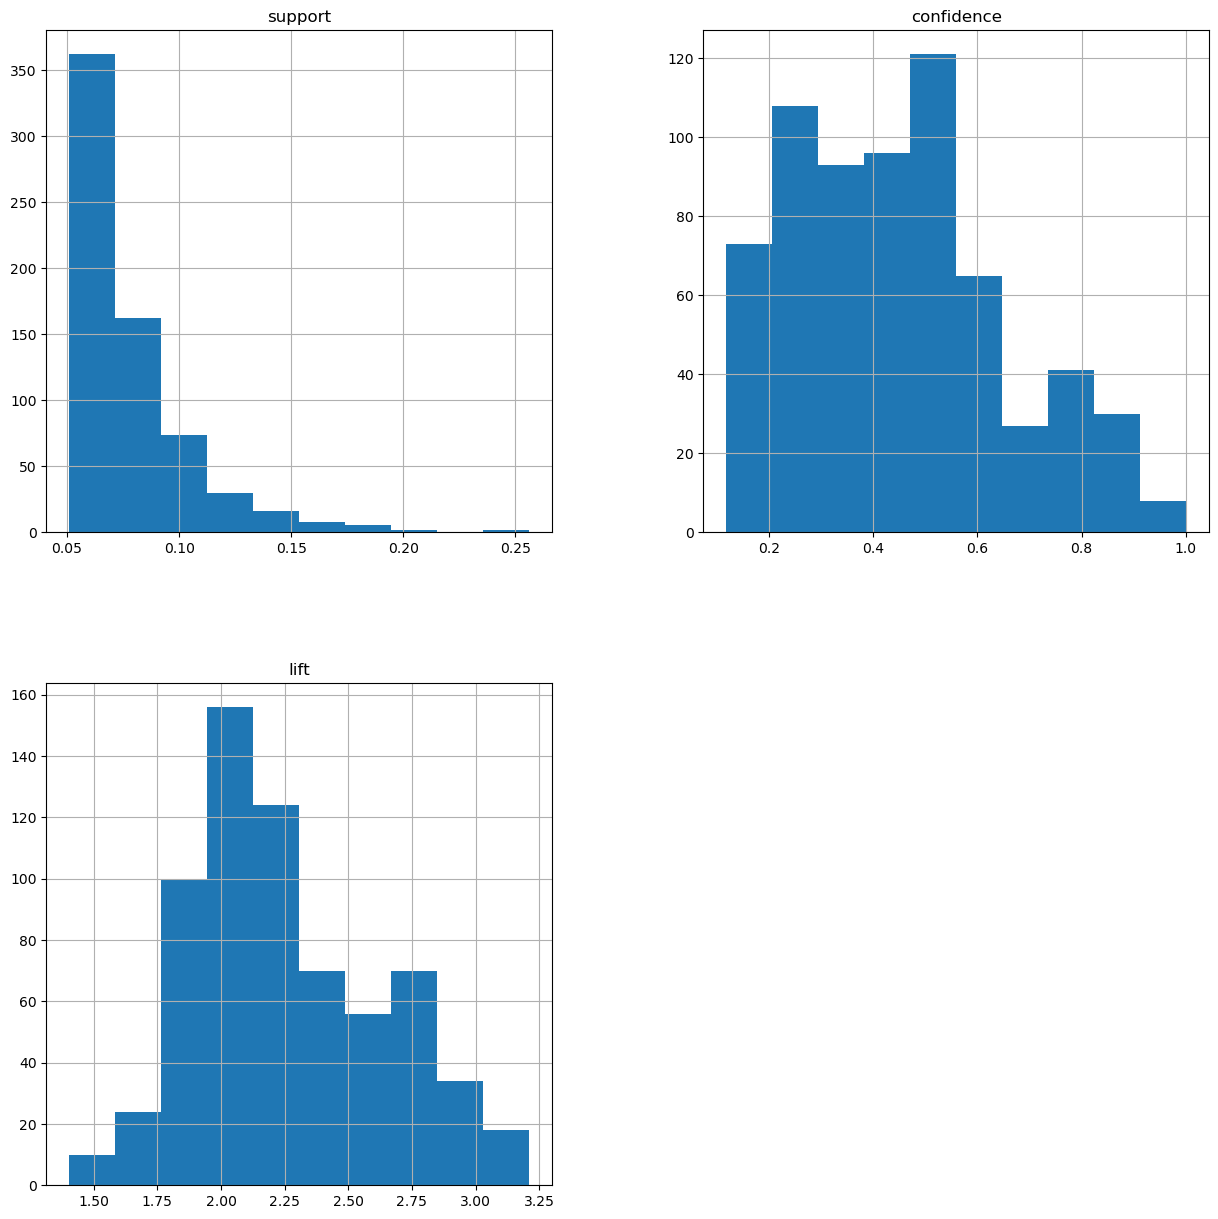

In [24]:
rules[['support','confidence','lift']].hist(figsize=(15,15))
plt.show()

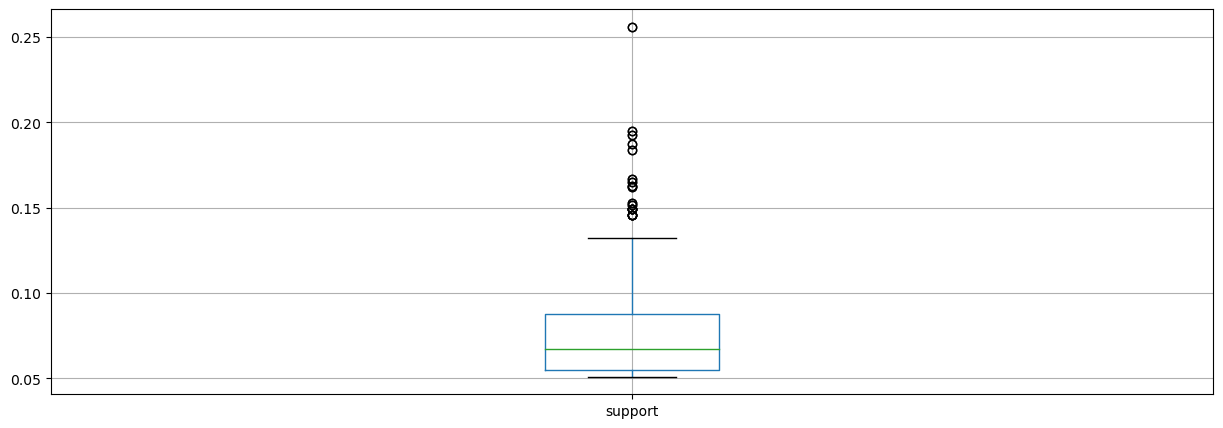

In [25]:
rules[['support']].boxplot(figsize=(15,5))
plt.show()

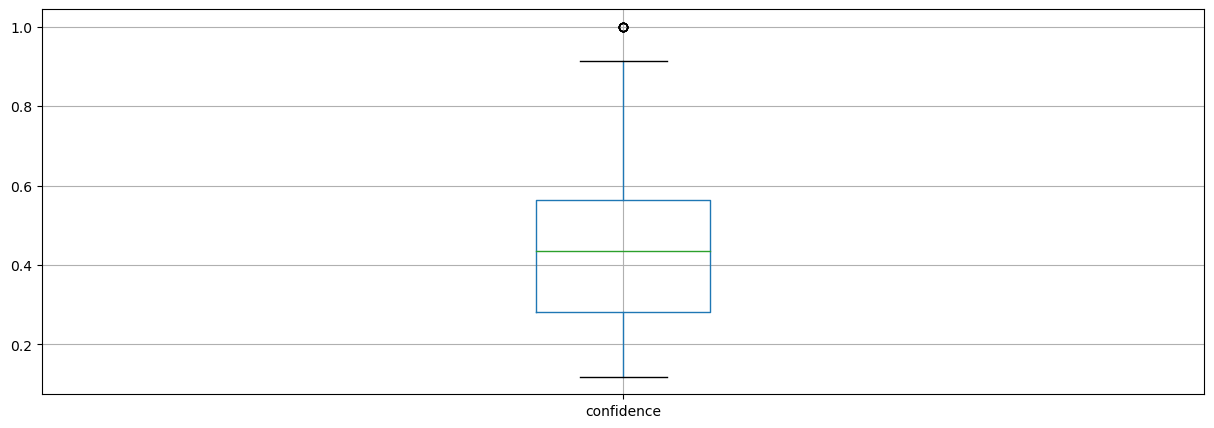

In [26]:
rules[['confidence']].boxplot(figsize=(15,5))
plt.show()

<Axes: >

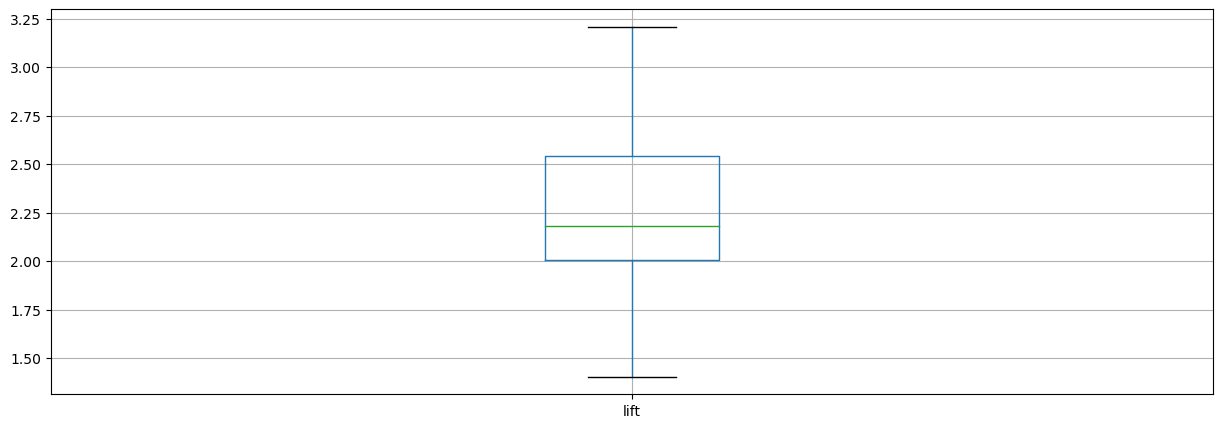

In [27]:
rules[['lift']].boxplot(figsize=(15,5))

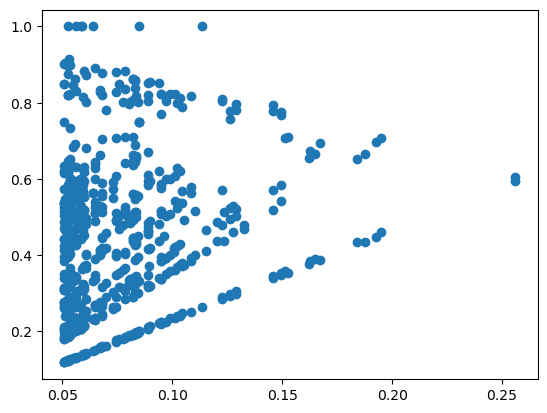

In [28]:
plt.scatter(rules['support'],rules['confidence'])
plt.show()

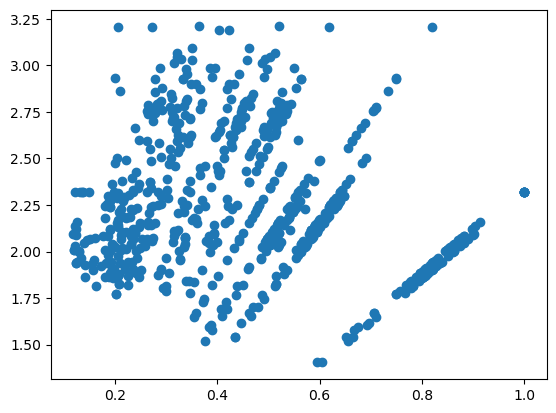

In [29]:
plt.scatter(rules['confidence'],rules['lift'])
plt.show()

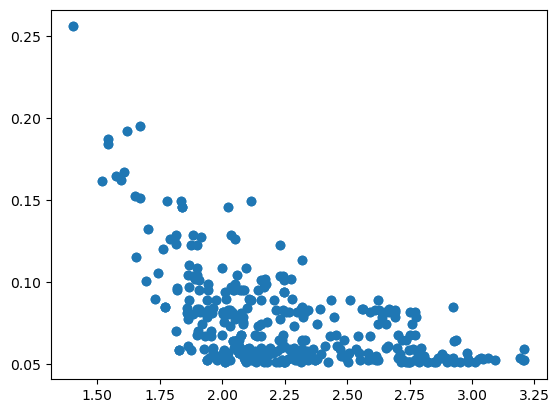

In [30]:
plt.scatter(rules['lift'],rules['support'])
plt.show()

# Here, we have shown the different types of graphs, like the histogram, boxplot, and scatter plot, by considering the columns support, confidence, and lift.